In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("bank_marketing_updated_v1.csv", header= 2) # or instead of header= we can use skiprows= 2

In [4]:
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.

In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [6]:
inp0['age'] = inp0['age'].astype('Int64')

In [7]:
print(inp0['age'].mean())

40.93565090394105


In [8]:
#droping the customer id as it is of no use.
inp0.drop('customerid', axis= 1,inplace= True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [9]:
#Extracting job in newly created 'job' column from "jobedu" column.
inp0['job']= inp0["jobedu"].apply(lambda x : x.split(',')[0])

In [10]:
#Extracting education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0["jobedu"].apply(lambda x : x.split(',')[1])

In [11]:
#droping the "jobedu" column from the dataframe.
inp0.drop('jobedu',axis= 1, inplace= True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [12]:
inp0[inp0.month.apply(lambda x : isinstance(x,float)) == True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [13]:
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64


Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).

In [14]:
inp0.age.isnull().sum()

20

In [15]:
inp0.shape

(45211, 19)

In [16]:
float(100.0*20/45211)

0.04423702196368141

In [17]:
#droping the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[inp0['age'].isnull() == False]
inp1.shape

(45191, 19)

In [18]:
#counting the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [19]:
#printing the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize= True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [20]:
#finding the mode of month in inp1
inp1.month.mode()[0]

'may, 2017'

In [21]:
# filling the missing values with mode value of month in inp1.
inp1.month.fillna(inp1.month.mode()[0], inplace= True)
inp1.month.value_counts(normalize= True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [22]:
#lchecking the null values in the month column.
inp1.month.isnull().sum()

0

In [23]:
#counting the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [24]:
#calculating the percentage of missing values in response column. 
float(100.0 * 30/45191)


0.06638489964816004

In [25]:
#dropping the records with response missings in inp1.
inp1 = inp1[inp1.response.isnull() == False]
inp1.shape

(45161, 19)

In [26]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45161 non-null  Int64 
 1   salary     45161 non-null  int64 
 2   balance    45161 non-null  int64 
 3   marital    45161 non-null  object
 4   targeted   45161 non-null  object
 5   default    45161 non-null  object
 6   housing    45161 non-null  object
 7   loan       45161 non-null  object
 8   contact    45161 non-null  object
 9   day        45161 non-null  int64 
 10  month      45161 non-null  object
 11  duration   45161 non-null  object
 12  campaign   45161 non-null  int64 
 13  pdays      45161 non-null  int64 
 14  previous   45161 non-null  int64 
 15  poutcome   45161 non-null  object
 16  response   45161 non-null  object
 17  job        45161 non-null  object
 18  education  45161 non-null  object
dtypes: Int64(1), int64(6), object(12)
memory usage: 6.9+ MB


In [27]:
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.

- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [28]:
#describing the pdays column with considering the -1 values.
inp1.loc[inp1.pdays<0, 'pdays'] = np.NaN
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Major approaches to the Handle outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


In [29]:
#describing the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

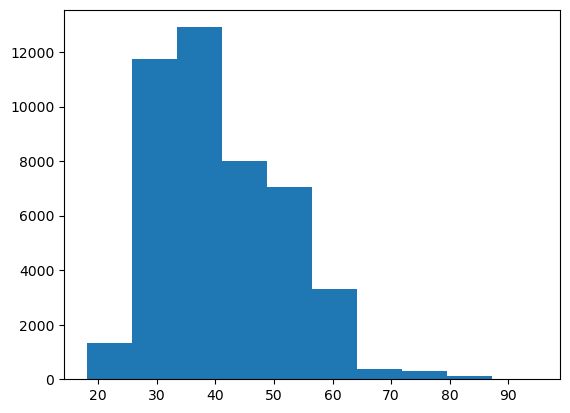

In [30]:
#plotting the histogram of age variable.
plt.hist(inp1.age) #or inp1.age.plot.hist()
plt.show()

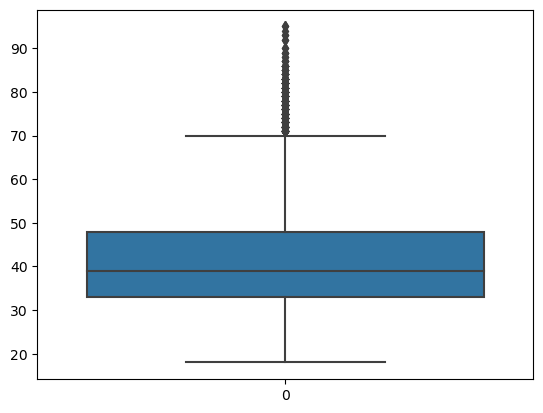

In [31]:
#plotting the boxplot of age variable.
sns.boxplot(inp1.age)
plt.show()

In [32]:
#describing the salary variable of inp1.
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

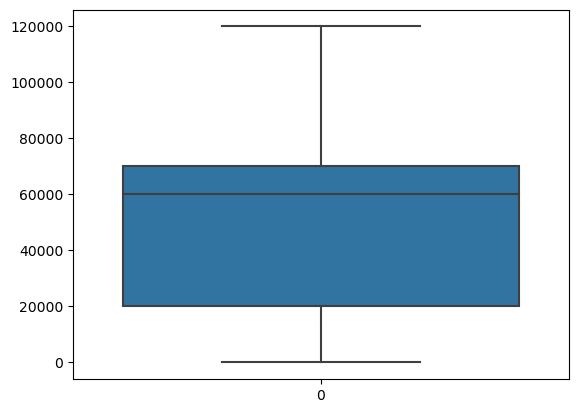

In [33]:
#plotting the boxplot of salary variable.
sns.boxplot(inp1.salary)
plt.show()

In [34]:
#describing the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

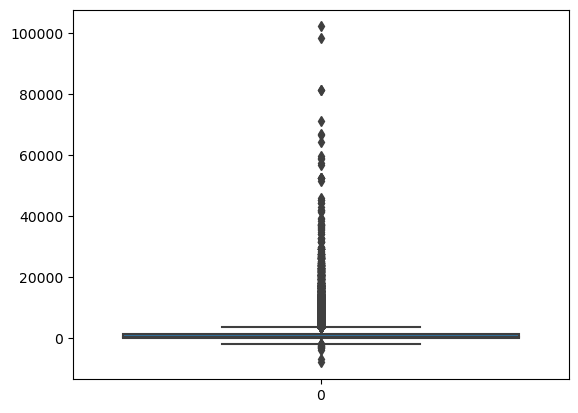

In [35]:
#plotting the boxplot of balance variable.
#plt.figure(figsize=(8,2))
sns.boxplot(inp1.balance)
plt.show()

In [36]:
#printing the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

In [37]:
inp1[inp1.balance > 15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

In [38]:
inp1.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [39]:
#describing the duration variable of inp1
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [40]:
#converting the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration = inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find('sec')> 0 else float(x.split()[0]))
inp1.duration.head()

0    4.350000
1    2.516667
2    1.266667
3    1.533333
4    3.300000
Name: duration, dtype: float64

In [41]:
#describing the duration variable
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [42]:
inp1.reset_index(inplace= True, drop= True)

Univariate Analysis 

In [43]:
inp1.marital.value_counts(normalize= True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

<Axes: >

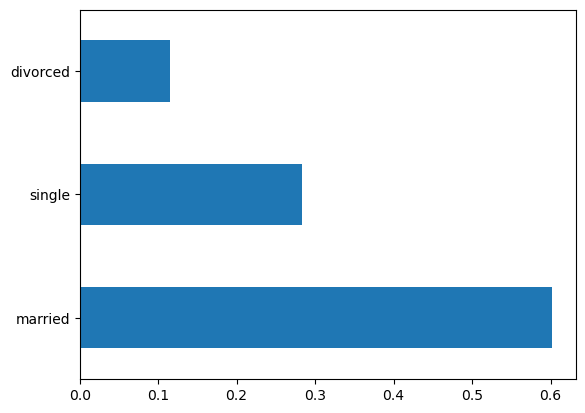

In [44]:
#plotting the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize= True).plot.barh()

In [45]:
#calculating the percentage of each job status category.
inp1.job.value_counts(normalize= True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

<Axes: >

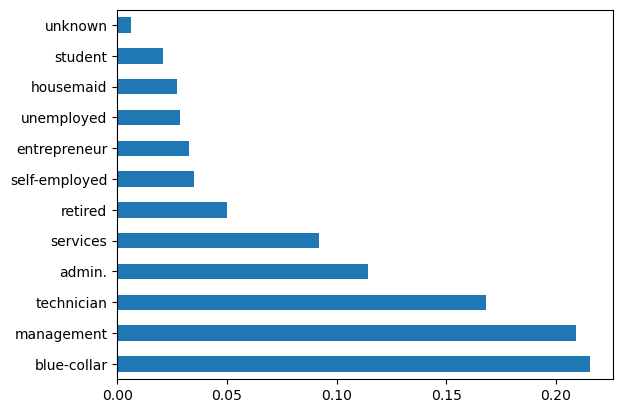

In [46]:
#plotting the bar graph of percentage job categories
inp1.job.value_counts(normalize= True).plot.barh()

Categorical ordered univariate analysis 


In [47]:
#calculating the percentage of each education category.
inp1.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

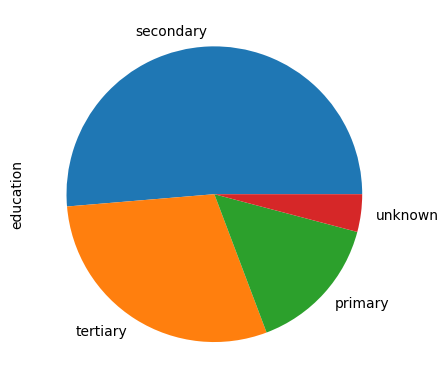

In [48]:
#plotting the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

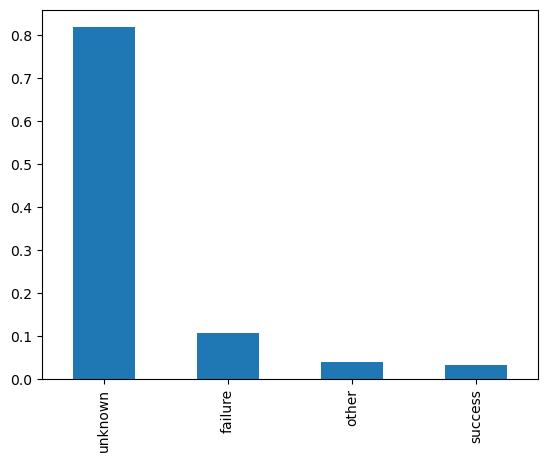

In [49]:
#calculating the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize= True).plot.bar()
plt.show()

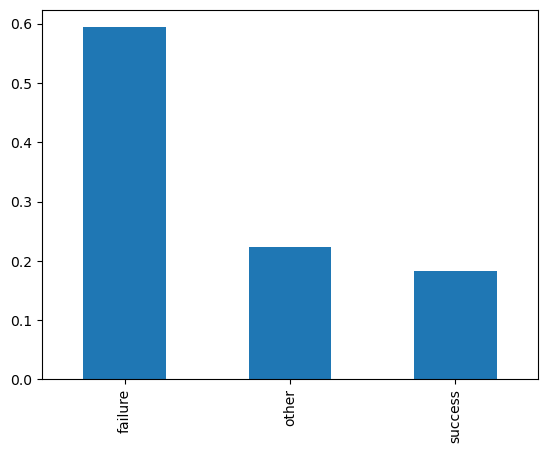

In [50]:
inp1[inp1.poutcome != 'unknown'].poutcome.value_counts(normalize= True).plot.bar()
plt.show()

In [51]:
#calculating the percentage of each response category.
inp1.response.value_counts(normalize= True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

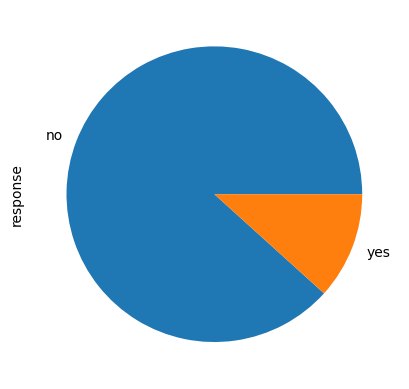

In [52]:
#plotting the pie chart of response categories
inp1.response.value_counts(normalize= True).plot.pie()
plt.show()

Bivariate and Multivariate Analysis

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

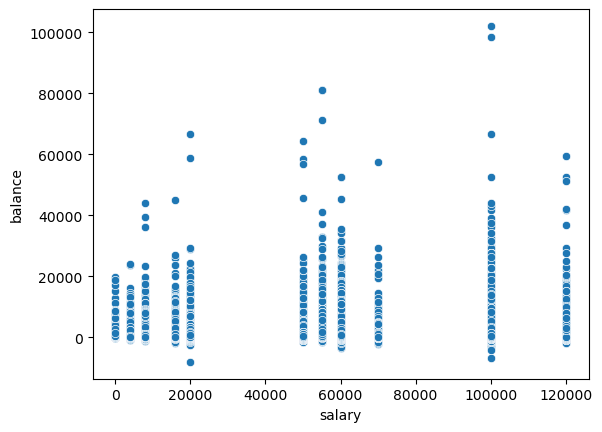

In [53]:
#plotting the scatter plot of balance and salary variable in inp1
sns.scatterplot(y= inp1.balance, x= inp1.salary)
plt.show()

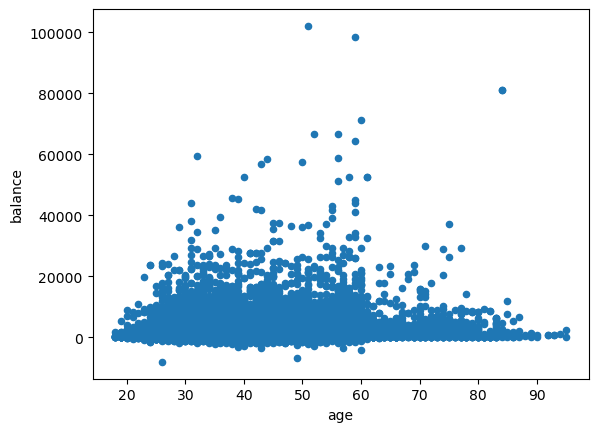

In [54]:
#plotting the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x ='age', y= 'balance')
plt.show()

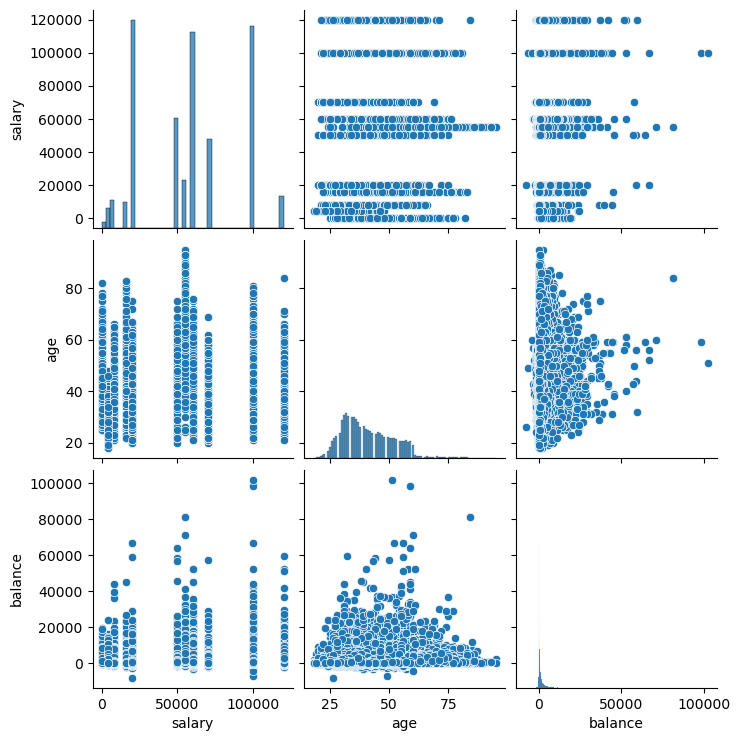

In [55]:
#plotting the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data= inp1, vars=['salary','age','balance'])
plt.show()

In [56]:
#plotting the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


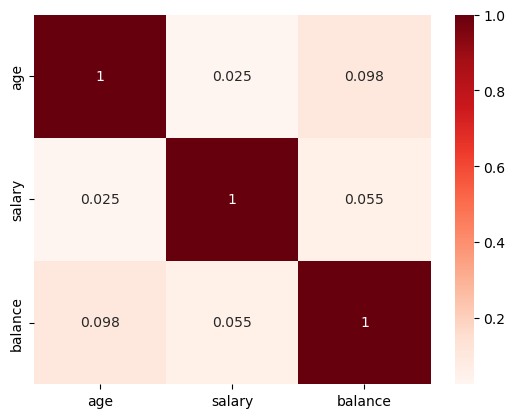

In [57]:
sns.heatmap(inp1[['age','salary','balance']].corr(),annot = True, cmap= 'Reds' )
plt.show()

In [58]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [59]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

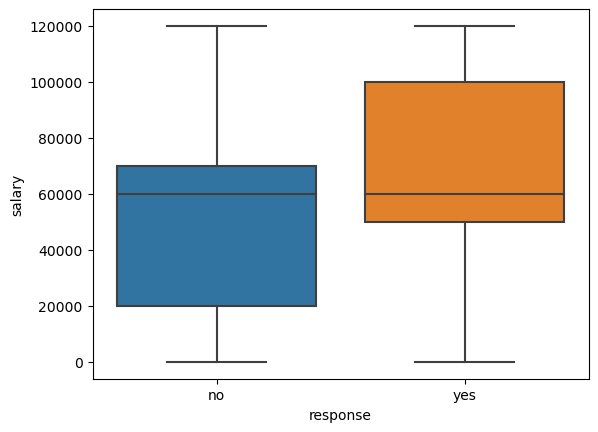

In [60]:
#plotting the box plot of salary for yes & no responses.
sns.boxplot(data= inp1, x= 'response', y= 'salary')
plt.show()

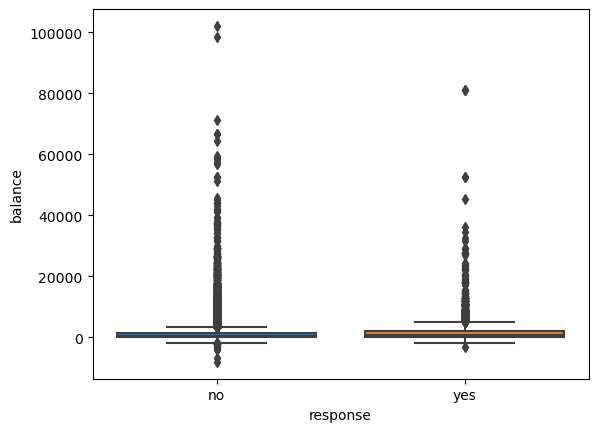

In [61]:
#plotting the box plot of balance for yes & no responses.
sns.boxplot(data= inp1, x= 'response', y= 'balance')
plt.show()

In [62]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [63]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [64]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [65]:
#calculating the mean, median and 75th percentile of balance with response
inp1.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


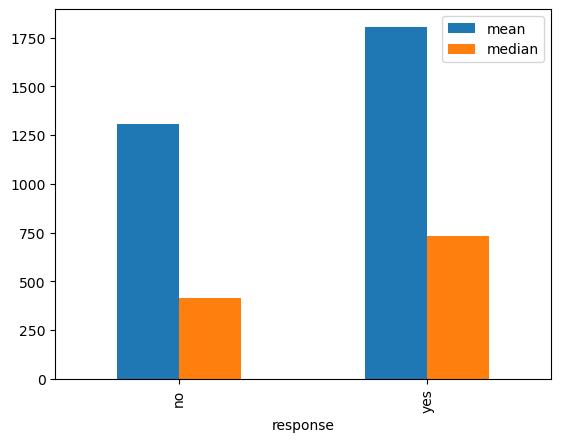

In [66]:
#plotting the bar graph of balance's mean an median with response.
inp1.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()
plt.show()

In [67]:
#groupby the education to find the mean of the salary education category.
inp1.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [68]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

In [69]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby('job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

In [70]:
#creating response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag'] = np.where(inp1.response == 'yes',1,0)

In [71]:
inp1.response_flag.value_counts()


0    39876
1     5285
Name: response_flag, dtype: int64

In [72]:
inp1['response'].value_counts(normalize= True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [73]:
inp1['response_flag'].mean()

0.1170257523084077

In [74]:
#calculating the mean of response_flag with different education categories.
inp1.groupby('education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

In [75]:
#calculating the mean of response_flag with different marital status categories.
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

<Axes: ylabel='marital'>

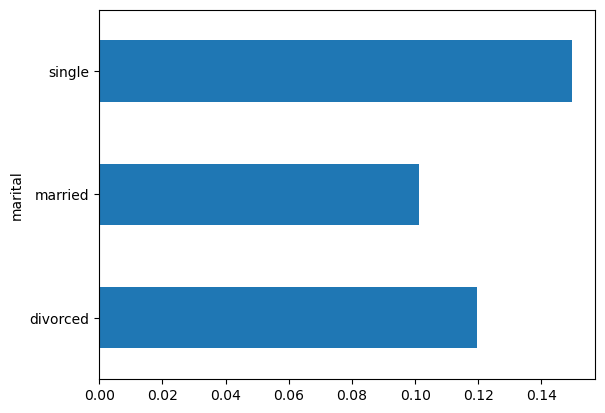

In [76]:
#plotting the bar graph of marital status with average value of response_flag
inp1.groupby('marital')['response_flag'].mean().plot.barh()

<Axes: xlabel='loan'>

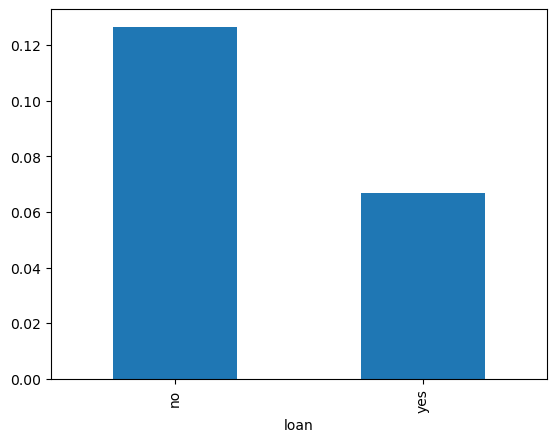

In [77]:
#plotting the bar graph of personal loan status with average value of response_flag
inp1.groupby('loan')['response_flag'].mean().plot.bar()

<Axes: xlabel='housing'>

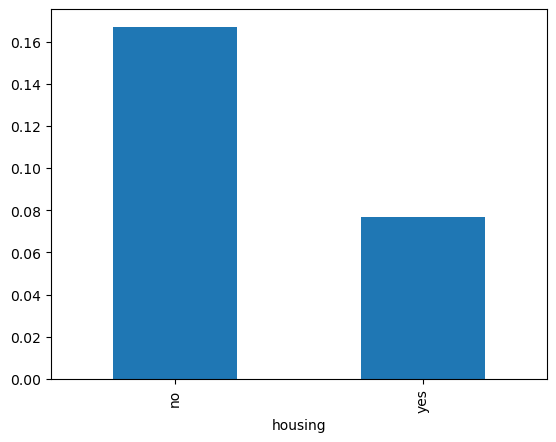

In [78]:
#plotting the bar graph of housing loan status with average value of response_flag
inp1.groupby('housing')['response_flag'].mean().plot.bar()

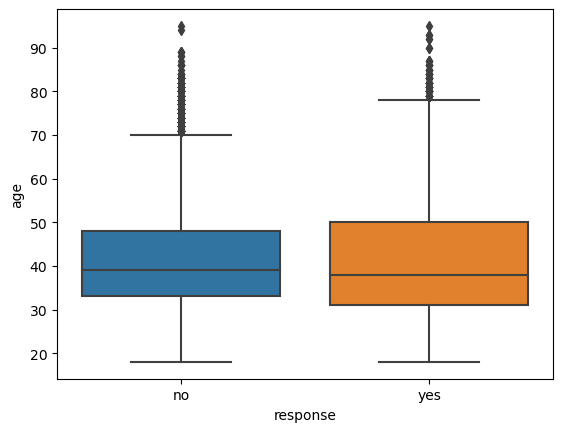

In [79]:
#plotting the boxplot of age with response_flag
sns.boxplot(data= inp1, x= 'response', y= 'age')
plt.show()

In [80]:
#creating the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
pd.cut(inp1.age, [0,30,40,50,60,9999],labels= ['<30','30-40','40-50','50-60','60+'])

0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45156    50-60
45157      60+
45158      60+
45159    50-60
45160    30-40
Name: age, Length: 45161, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [81]:
inp1['age_group'] = pd.cut(inp1.age, [0,30,40,50,60,9999],labels= ['<30','30-40','40-50','50-60','60+'])

In [82]:
inp1.age_group.value_counts(normalize= True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

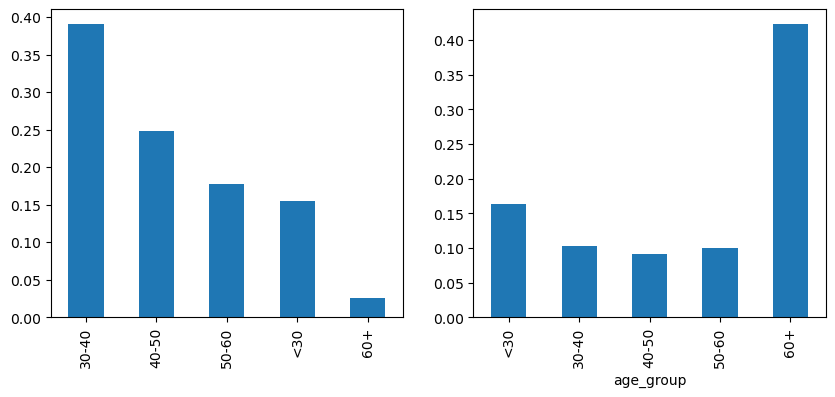

In [83]:
#plotting the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize= [10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize= True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby('age_group')['response_flag'].mean().plot.bar()
plt.show()

<Axes: ylabel='job'>

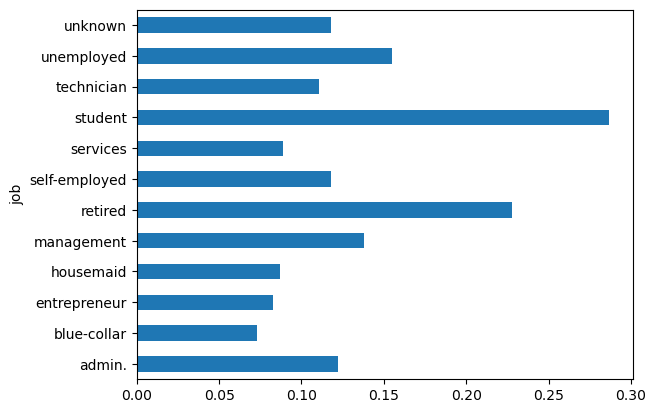

In [84]:
#plotting the bar graph of job categories with response_flag mean value.
inp1.groupby('job')['response_flag'].mean().plot.barh()

In [85]:
#creating heat map of education vs marital vs response_flag
res = pd.pivot_table(data= inp1,index= 'education',columns= 'marital',values= 'response_flag')

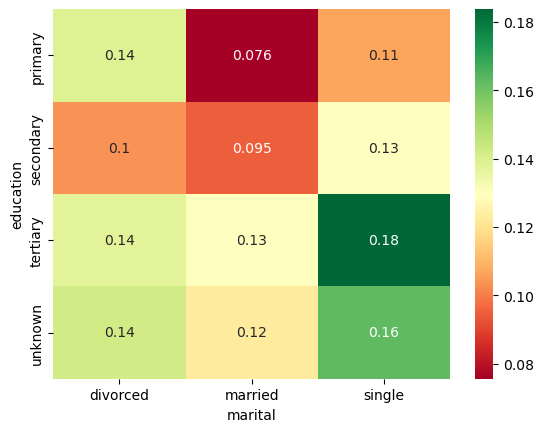

In [86]:
#creating the heat map of Job vs marital vs response_flag.
sns.heatmap(res , annot= True, cmap= 'RdYlGn')
plt.show()

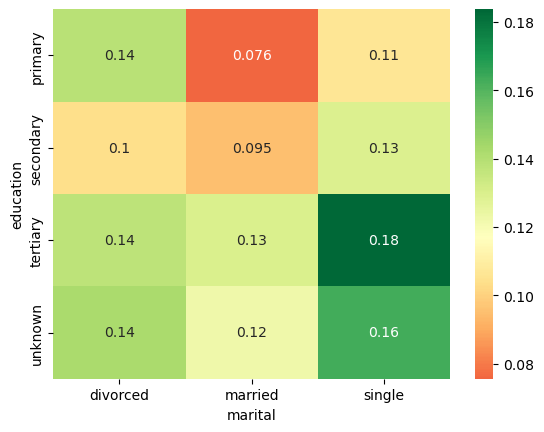

In [87]:
sns.heatmap(res , annot= True, cmap= 'RdYlGn', center= 0.117)
plt.show()

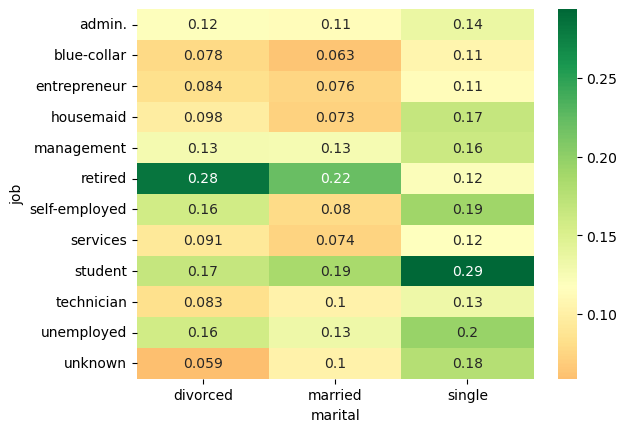

In [88]:
#creating the heat map of education vs poutcome vs response_flag.
r= pd.pivot_table(data= inp1, index= 'job', columns='marital',values='response_flag')
sns.heatmap(r,annot= True, cmap='RdYlGn', center= 0.117)
plt.show()

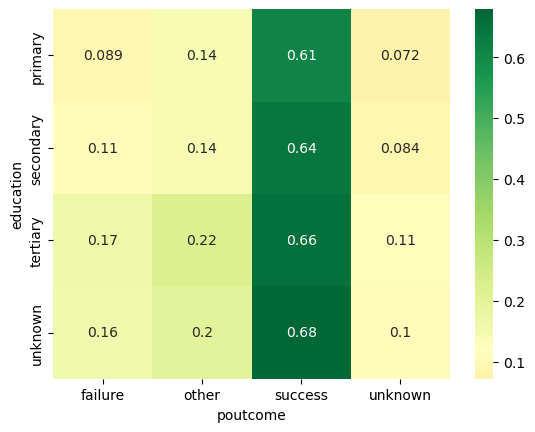

In [89]:
re1= pd.pivot_table(data= inp1, index= 'education', columns='poutcome',values='response_flag')
sns.heatmap(re1,annot= True, cmap='RdYlGn', center= 0.117)
plt.show()

In [90]:
inp1[inp1.pdays > 0].response_flag.mean()

0.2307785593014795

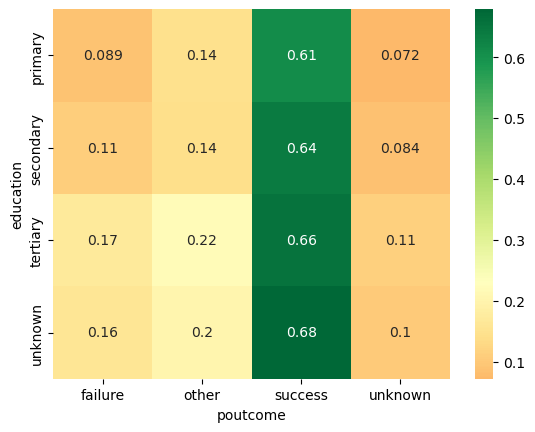

In [91]:
re1= pd.pivot_table(data= inp1, index= 'education', columns='poutcome',values='response_flag')
sns.heatmap(re1,annot= True, cmap='RdYlGn', center= 0.230)
plt.show()